<a href="https://colab.research.google.com/github/Davis-Tony/DS-Unit-1-Sprint-2-Statistics/blob/master/TonyDavis_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [ ]:
#importing pandas and numpy
import pandas as pd
import numpy as np

#reading in data
url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv'
bootcamp = pd.read_csv(url)
print(bootcamp.shape)
bootcamp.head()


(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


In [ ]:
bootcamp.shape

(2761, 15)

**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [ ]:
sample20 = bootcamp.sample(20, random_state=42) #sample of 20
sample200 = bootcamp.sample(200, random_state=42) #sample of 200

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [ ]:
mean20=sample20['ConvertedSalary'].mean()
mean200=sample200['ConvertedSalary'].mean()

print("The mean of the sample of 20 is",mean20)
print("The mean of the sample of 200 is",mean200)

The mean of the sample of 20 is 55752.2
The mean of the sample of 200 is 68551.255


**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I would trust the sample of 200 more because it's a larger sample size so it may have a better chance of representing a value closer to that of the overall dataset.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

Yes. With a dataset of over 2,700 entries, a sample of only 20 represents less than 1% of the total population. There's a chance that certain parts of the dataset would not even be sampled in pulling such a small random number

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [ ]:
#importing stats
from scipy import stats

In [ ]:
#building arrays
salary20 = np.array(sample20['ConvertedSalary'])
salary200 = np.array(sample200['ConvertedSalary'])

In [ ]:
#Calculating 95% confidence interval of 20-list sample
CI_freq20 = stats.t.interval(0.95, len(salary20), loc=np.mean(salary20), scale=stats.sem(salary20))
CI_freq20

(35872.392631018534, 75632.00736898146)

In [ ]:
#Interpretation: I am 95% confident, given this sample, the mean is between 35,872 and 75,632

In [ ]:
#Calculating 95% confidence interval of 200-list sample
CI_freq200 = stats.t.interval(0.95, len(salary200), loc=np.mean(salary200), scale=stats.sem(salary200))
CI_freq200

(60593.30223951439, 76509.20776048562)

In [ ]:
#Interpretation: I am 95% confident, given this sample of 200, the mean is between 60,593 and 76,509

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [ ]:
#importing math
import math

#Mean and MOE of 20-list sample
print('The mean of the 20-list sameple is',mean20)#Here's the mean

#Finding standard deviation
std20 = sample20['ConvertedSalary'].std()
ss20 = 20

z_critical = stats.norm.ppf(q=0.95)

#Calculating margin of error
moe20 = (z_critical)*(std20/math.sqrt(ss20))

print('The margin of error is', moe20)


The mean of the 20-list sameple is 55752.2
The margin of error is 15675.909037057321


In [ ]:
#Repeating for the 200-list sample

#Printing the mean of the 200-list sample
print('The mean of the 200-list sample is',mean200)#Here's the mean

#Finding standard deviation
std200 = sample200['ConvertedSalary'].std()
ss200 = 200 #Sample size variable

#Calculating margin of error
moe200 = (z_critical)*(std200/math.sqrt(ss200))

print('The margin of error is',moe200)

The mean of the 200-list sample is 68551.255
The margin of error is 6638.11173444321


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

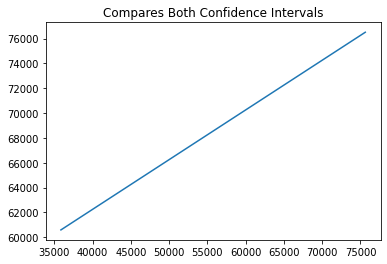

In [31]:
#importing matplotlib
import matplotlib.pyplot as plt

plt.errorbar(CI_freq20, CI_freq200, xerr=0.5, yerr=0.5)
plt.title('Compares Both Confidence Intervals')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

<BarContainer object of 2 artists>

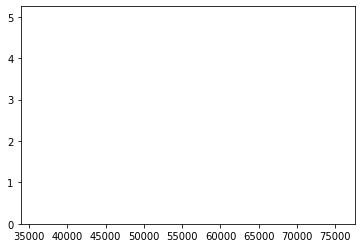

In [ ]:
#Creating bar chart
plt.bar(CI_freq20, color='green')

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [ ]:
#Confidence Interval for entire dataset
CI_full = z_critical*(bootcamp['ConvertedSalary'].std()/math.sqrt(2761))
print('The confidence interval for the entire dataset is',CI_full)

The confidence interval for the entire dataset is 1806.5439788105484


**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision refers to the closeness of multiple measurements to each other.

Accurancy refers to the closeness of a measured value to a standard or known value.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

The confidence interval means that 95% of confidence intervals calculated from the given sample size will contain the true population mean.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.